<a href="https://colab.research.google.com/github/safeai-snu/Econometrics/blob/main/Part.1/3.Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 예제 3-1. 시각화 예시 

### 1) 포틀랜드 월간 대중교통 이용자 수 데이터 시각화

#### 필요한 패키지 불러오기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### 데이터 불러오기

In [2]:
pot_tp = pd.read_csv("https://raw.githubusercontent.com/safeai-snu/Econometrics/refs/heads/main/Part.1/data/port_tran_riders.csv")
pot_tp['Month'] = pd.to_datetime(pot_tp['Month'], format='%Y-%m', errors='coerce')
pot_tp = pot_tp.set_index(keys = 'Month')

#### 시각화

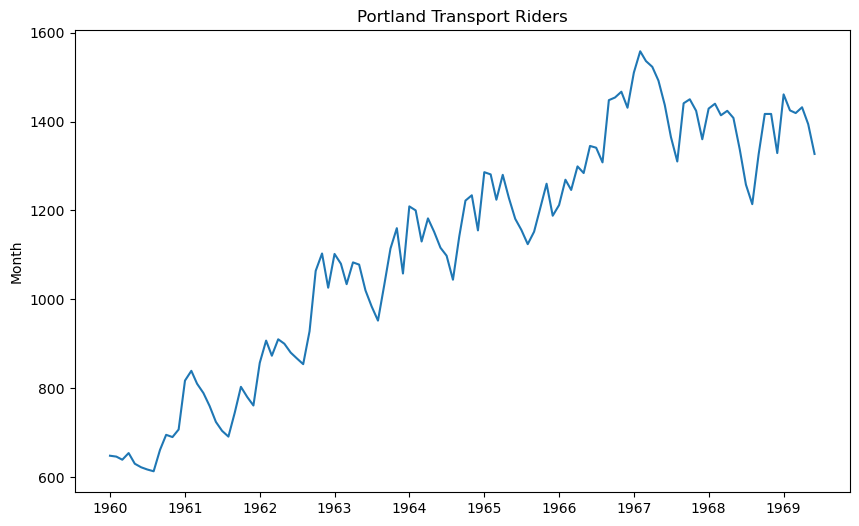

In [3]:
plt.figure(figsize=(10, 6))
plt.plot(pot_tp)
plt.ylabel('Month')
plt.title('Portland Transport Riders')
plt.show()

### 2) 미국 소매업 고용자 수 데이터 시각화

#### 데이터 불러오기

In [4]:
us_employment = pd.read_csv("https://raw.githubusercontent.com/safeai-snu/Econometrics/refs/heads/main/Part.1/data/us_employment.csv")

#### 데이터 전처리

In [5]:
us_employment['Month'] = pd.to_datetime(us_employment['Month'], errors='coerce')
filtered_data = us_employment[(us_employment['Title'] == "Retail Trade") & (us_employment['Month'].dt.year >= 1980)]

#### 시각화

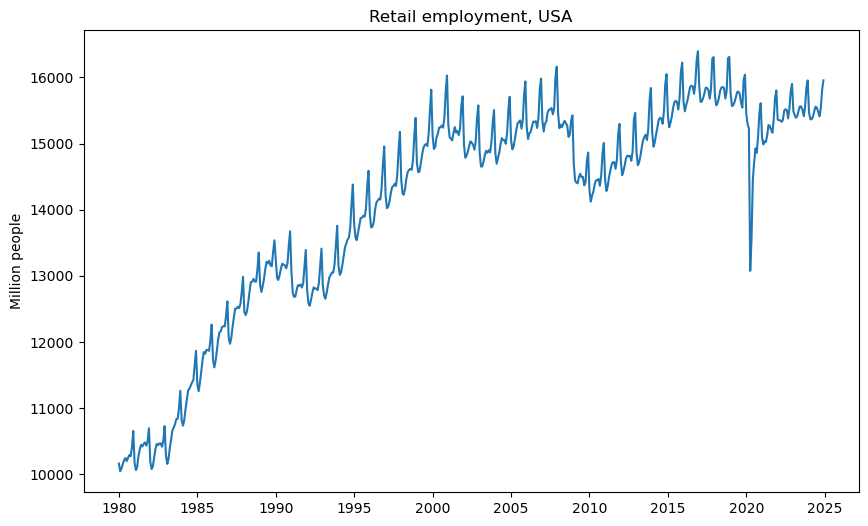

In [6]:
x = filtered_data['Month'].to_numpy()
y = filtered_data['Employed'].to_numpy()

plt.figure(figsize=(10, 6))
plt.plot(x, y)
plt.ylabel('Million people')
plt.title('Retail employment, USA')
plt.show()

### 3) 애플 주가 데이터 시각화

#### 필요한 패키지 설치 및 불러오기

In [7]:
#!pip install yfinance
import yfinance as yf

#### 애플(AAPL) 주식 데이터 가져오기

In [8]:
ticker = "AAPL"
start_date = "2018-01-01"
end_date = "2024-12-31"

#### 주식 데이터 다운로드

In [9]:
stock = yf.download(ticker, start=start_date, end=end_date)

[*********************100%***********************]  1 of 1 completed


#### 종가 데이터 추출

In [10]:
stock = stock[['Close']]

In [11]:
stock

Price,Close
Ticker,AAPL
Date,
2018-01-02,40.479828
2018-01-03,40.472786
2018-01-04,40.660789
2018-01-05,41.123714
2018-01-08,40.970978
...,...
2024-12-23,254.989655
2024-12-24,257.916443


#### 시각화

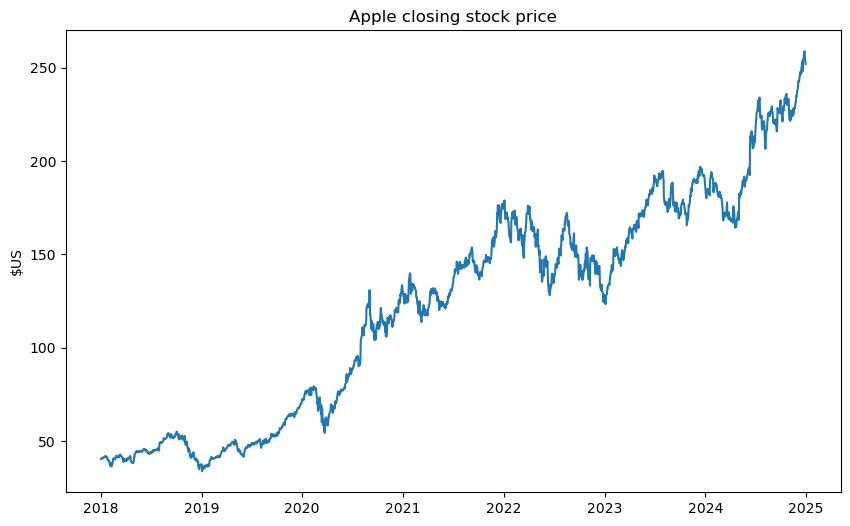

In [12]:
x = stock.index.to_numpy()
y = stock['Close'].to_numpy()

plt.figure(figsize=(10, 6))
plt.plot(x, y)
plt.ylabel('$US')
plt.title('Apple closing stock price')
plt.show()

### 5) 스라소니 포획량 데이터 시각화

#### 데이터 불러오기

In [13]:
pelt = pd.read_csv("https://raw.githubusercontent.com/safeai-snu/Econometrics/refs/heads/main/Part.1/data/pelt.csv")

#### 시각화

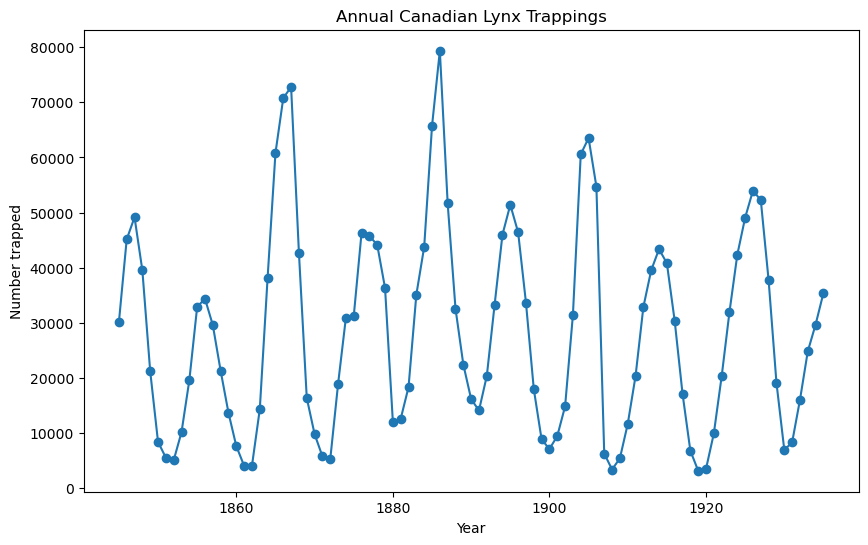

In [14]:
x = pelt['Year'].to_numpy()
y = pelt['Lynx'].to_numpy()

plt.figure(figsize=(10, 6))
plt.plot(x, y, marker='o')
plt.title('Annual Canadian Lynx Trappings')
plt.xlabel('Year')
plt.ylabel('Number trapped')
plt.show()

## 예제 3-2. 다중 계절성 그래프 예시

### 1) 빅토리아 전력 수요량 다중 계절성 그래프

#### 필요한 패키지 불러오기

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

#### 데이터 불러오기

In [16]:
vic_elec = pd.read_csv("https://raw.githubusercontent.com/safeai-snu/Econometrics/refs/heads/main/Part.1/data/vic_elec.csv")

#### 데이터 전처리

In [17]:
vic_elec['Time'] = pd.to_datetime(vic_elec['Time'])

#### 시각화

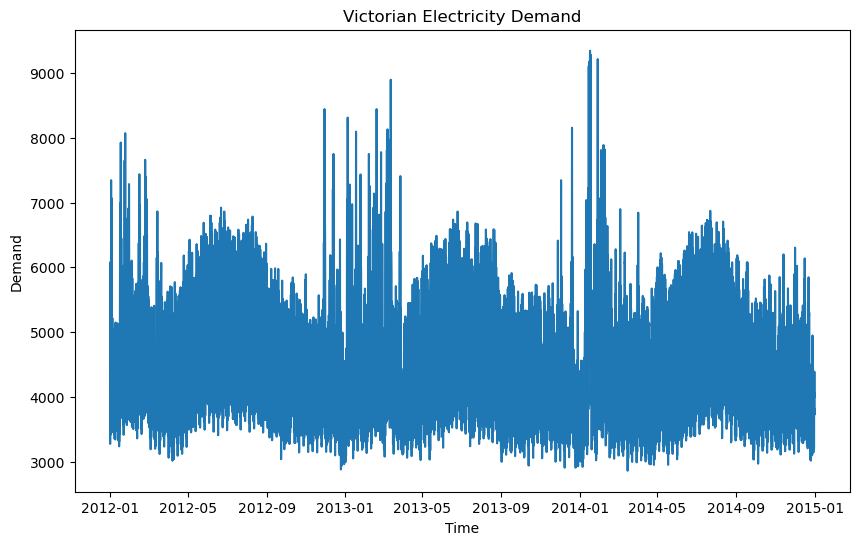

In [18]:
x = vic_elec['Time'].to_numpy()
y = vic_elec['Demand'].to_numpy()

plt.figure(figsize=(10, 6))
plt.plot(x, y)
plt.title('Victorian Electricity Demand')
plt.xlabel('Time')
plt.ylabel('Demand')
plt.show()

### 2) 빅토리아 연간 전력 수요량 다중 계절성 그래프

#### 필요한 패키지 불러오기

In [19]:
import matplotlib.dates as mdates

#### 데이터 전처리

In [20]:
vic_elec['Year'] = vic_elec['Time'].dt.year
vic_elec['Normalized_Time'] = vic_elec['Time'].apply(lambda dt: dt.replace(year=2012))

#### 시각화

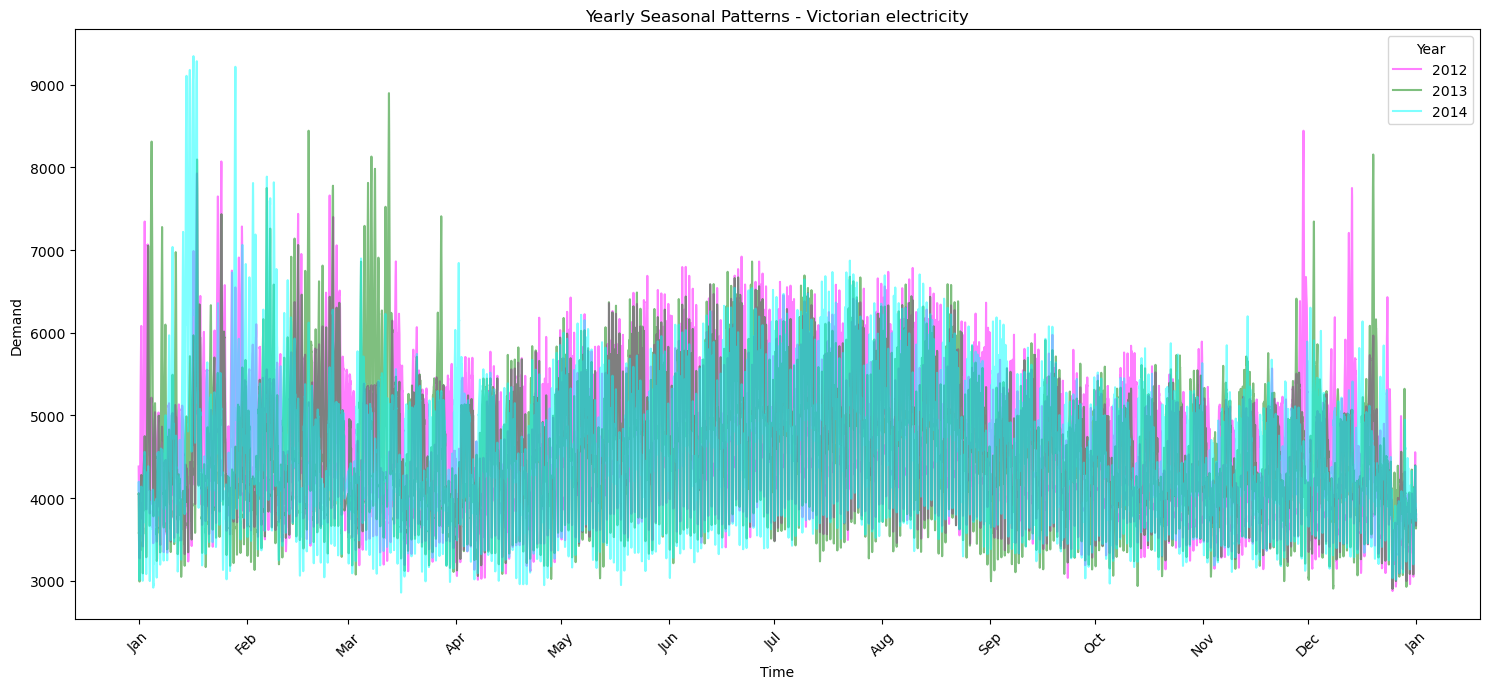

In [21]:
plt.figure(figsize=(15, 7))
colors = {2012: 'magenta', 2013: 'green', 2014: 'cyan'}

for year in sorted(vic_elec['Year'].unique()):
    yearly_data = vic_elec[vic_elec['Year'] == year]
    yearly_data = yearly_data.sort_values(by='Normalized_Time')
    x = yearly_data['Normalized_Time'].to_numpy()
    y = yearly_data['Demand'].to_numpy()
    plt.plot(x, y,
             color=colors[year], alpha=0.5, label=str(year))

plt.title('Yearly Seasonal Patterns - Victorian electricity')
plt.xlabel('Time')
plt.ylabel('Demand')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())

plt.xticks(rotation=45)
plt.legend(title='Year')
plt.tight_layout()
plt.show()

### 3) 빅토리아 일간 전력 수요량 다중 계절성 그래프

#### 데이터 전처리

In [22]:
vic_elec['Normalized_Date'] = vic_elec['Time'].dt.normalize()
vic_elec['Time_of_day'] = vic_elec['Time'].dt.hour + vic_elec['Time'].dt.minute / 60

#### 시각화

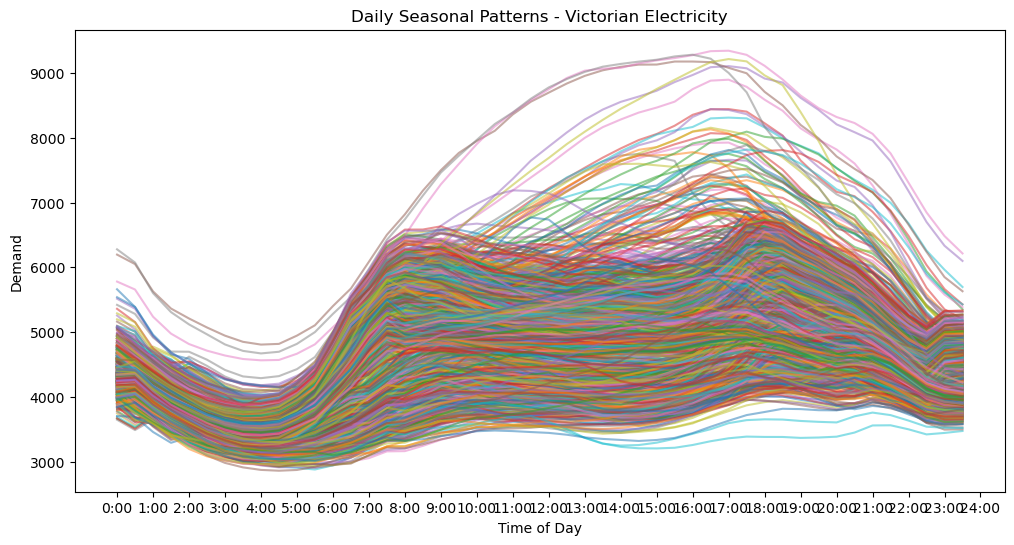

In [23]:
plt.figure(figsize=(12, 6))

daily_groups = vic_elec.groupby(vic_elec['Normalized_Date'])
for name, group in daily_groups:
    x = group['Time_of_day'].to_numpy()
    y = group['Demand'].to_numpy()
    plt.plot(x, y, label=name.strftime('%d/%m/%Y'), alpha=0.5)

plt.title('Daily Seasonal Patterns - Victorian Electricity')
plt.xlabel('Time of Day')
plt.ylabel('Demand')

plt.xticks(range(25), [f'{hour}:00' for hour in range(25)])
plt.show()

## 예제 3-3. 계절별 부분 시계열 그래프 예시

### 대기 이산화탄소 농도의 계절별 부분 시계열 그래프

#### 필요한 패키지 불러오기 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import statsmodels.api as sm

#### 데이터 불러오기 

In [48]:
co2 = sm.datasets.co2.load_pandas().data

#### 데이터 전처리 

In [49]:
co2 = co2.resample('QE').mean()
co2 = co2.diff()
co2 = co2[co2.index >= '1981-01-01']
co2['Quarter'] = co2.index.quarter
co2['Year'] = co2.index.year
co2

,co2,Quarter,Year
1981-03-31,3.176923,1,1981
1981-06-30,2.223077,2,1981
1981-09-30,-3.992308,3,1981
1981-12-31,-0.284615,4,1981
1982-03-31,3.353846,1,1982
...,...,...,...
2000-12-31,0.042857,4,2000
2001-03-31,3.053846,1,2001
2001-06-30,1.946154,2,2001
2001-09-30,-3.792308,3,2001


#### 시각화 

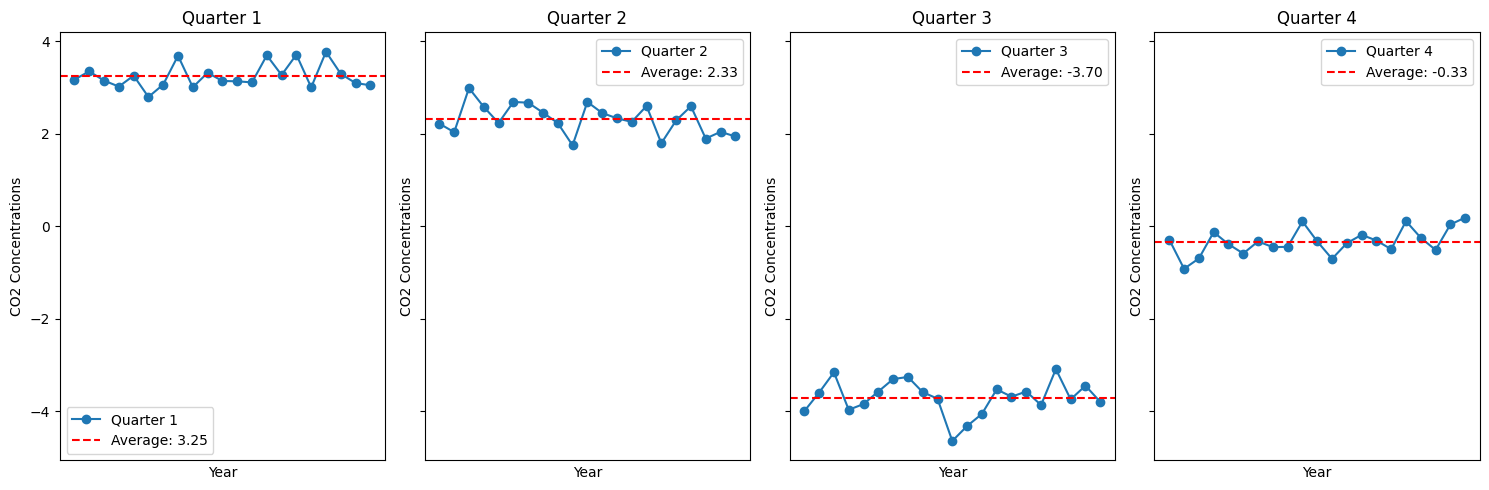

In [50]:
fig, axes = plt.subplots(1, 4, figsize=(15, 5), sharey=True)  # Adjusted figsize for horizontal layout

for i in range(1, 5):
    ax = axes[i-1]
    quarter_data = co2[co2['Quarter'] == i]
    x = quarter_data['Year'].to_numpy()
    y = quarter_data['co2'].to_numpy()
    ax.plot(x, y, marker='o', label=f'Quarter {i}')
    avg = quarter_data['co2'].mean()
    ax.axhline(y=avg, color='r', linestyle='--', label=f'Average: {avg:.2f}')

    ax.set_title(f'Quarter {i}')
    ax.set_xlabel('Year')
    ax.set_ylabel('CO2 Concentrations')
    ax.legend()

    ax.xaxis.set_major_locator(mdates.YearLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.tight_layout()
plt.show()

## 예제 3-4. 산점도 예시

### 호주 전력 수요와 기온 간의 산점도

#### 필요한 패키지 불러오기 

In [28]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

####  데이터 불러오기

In [29]:
vic_elec = pd.read_csv("https://raw.githubusercontent.com/safeai-snu/Econometrics/refs/heads/main/Part.1/data/vic_elec.csv")

#### 데이터 전처리

In [30]:
vic_elec['Time'] = pd.to_datetime(vic_elec['Time'])
vic_elec_2014 = vic_elec[vic_elec['Time'].dt.year == 2014]

def get_day_type(row):
    if row['Holiday']:
        return "Holiday"
    elif row['Time'].dayofweek < 5:
        return "Weekday"
    else:
        return "Weekend"

vic_elec_2014['Day_Type'] = vic_elec_2014.apply(get_day_type, axis=1)
vic_elec_day_type = vic_elec_2014

C:\Users\rats9\AppData\Local\Temp\ipykernel_17168\714706296.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vic_elec_2014['Day_Type'] = vic_elec_2014.apply(get_day_type, axis=1)


#### 시각화

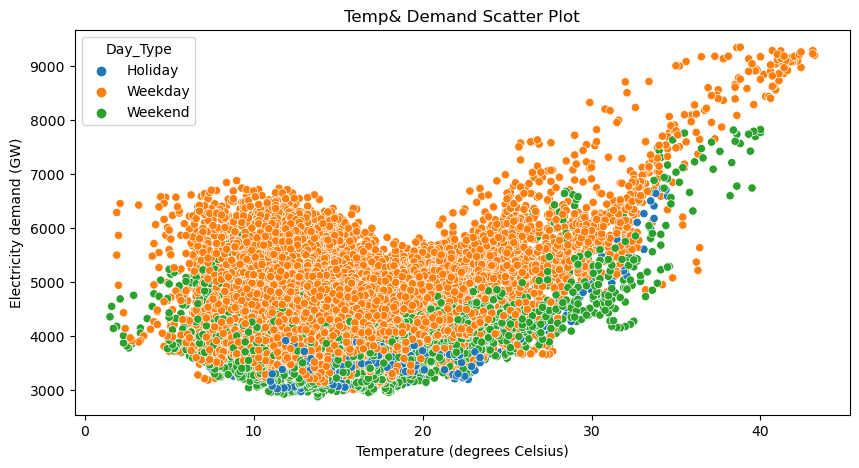

Temperature와 Demand의 상관계수: 0.27978542930216255


In [31]:
plt.figure(figsize=(10, 5))
sns.scatterplot(data=vic_elec_day_type, x='Temperature', y='Demand', hue='Day_Type')
plt.xlabel('Temperature (degrees Celsius)')
plt.ylabel('Electricity demand (GW)')
plt.title('Temp& Demand Scatter Plot')
plt.show()

correlation = vic_elec_2014['Temperature'].corr(vic_elec_2014['Demand'])
print("Temperature와 Demand의 상관계수:", correlation)

## 예제 3-5. 지연 그래프 예시

### 대기 이산화탄소 농도의 계절별 부분 시계열 그래프

#### 필요한 패키지 불러오기

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import lag_plot
import statsmodels.api as sm

#### 데이터 불러오기 

In [55]:
co2 = sm.datasets.co2.load_pandas().data

#### 데이터 전처리 

In [56]:
co2 = co2.resample('QE').mean()
co2 = co2[co2.index >= '1981-01-01']
co2['Quarter'] = co2.index.quarter
co2['Year'] = co2.index.year
co2

,co2,Quarter,Year
1981-03-31,340.269231,1,1981
1981-06-30,342.492308,2,1981
1981-09-30,338.500000,3,1981
1981-12-31,338.215385,4,1981
1982-03-31,341.569231,1,1982
...,...,...,...
2000-12-31,368.200000,4,2000
2001-03-31,371.253846,1,2001
2001-06-30,373.200000,2,2001
2001-09-30,369.407692,3,2001


#### Lag에 따른 시각화

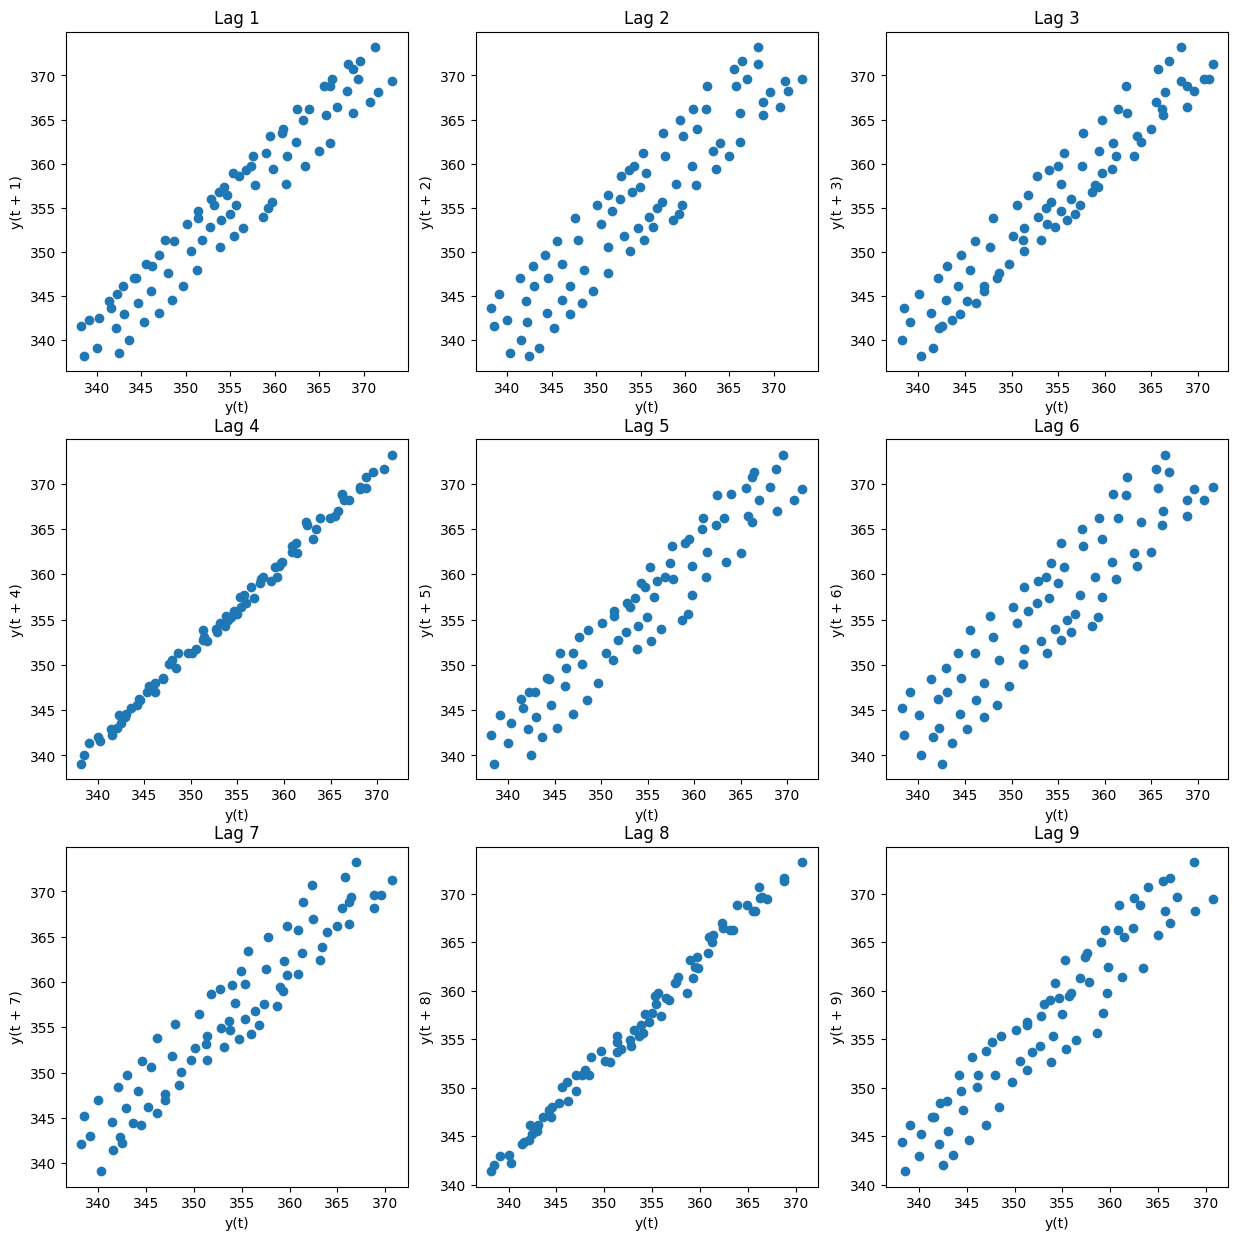

In [57]:
fig, axes = plt.subplots(3, 3, figsize=(15, 15))

# Iterate over different lags
for i, ax in enumerate(axes.flatten(), 1):
    lag_plot(co2['co2'], lag=i, ax=ax)
    ax.set_title(f'Lag {i}')
     
plt.show()

## 예제 3-6. ACF 예시

### 1) 미국 소매업 고용자 수 데이터 ACF

#### 필요한 함수 불러오기

In [36]:
from statsmodels.graphics.tsaplots import plot_acf

#### 데이터 불러오기

In [37]:
us_employment = pd.read_csv("https://raw.githubusercontent.com/safeai-snu/Econometrics/refs/heads/main/Part.1/data/us_employment.csv")

#### 데이터 전처리

In [38]:
us_employment['Month'] = pd.to_datetime(us_employment['Month'], errors='coerce')
retail = us_employment[(us_employment['Title'] == "Retail Trade") & (us_employment['Month'].dt.year >= 1980)]

#### 시각화

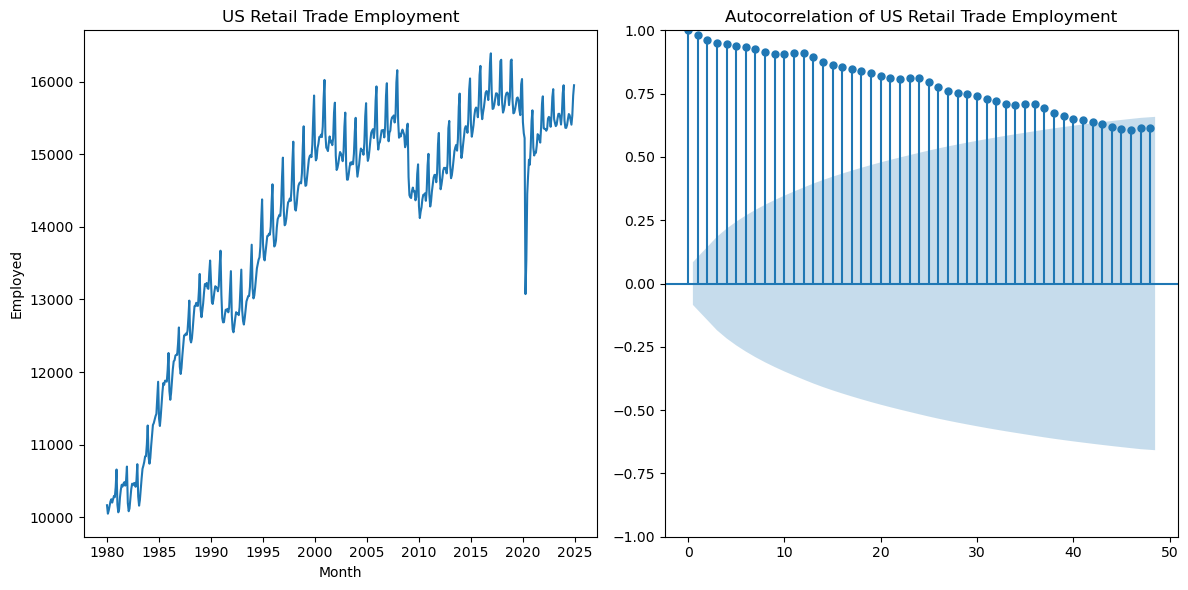

In [39]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

x = retail['Month'].to_numpy()
y = retail['Employed'].to_numpy()

ax1.plot(x, y)
ax1.set_title('US Retail Trade Employment')
ax1.set_xlabel('Month')
ax1.set_ylabel('Employed')

plot_acf(retail['Employed'], lags=48, ax=ax2)
ax2.set_title('Autocorrelation of US Retail Trade Employment')

plt.tight_layout()
plt.show()

### 2) 마이크로소프트 주가 데이터 ACF

#### 필요한 패키지 설치 및 불러오기

In [40]:
#!pip install yfinance
import yfinance as yf

#### 마이크로소프트(MSFT) 주식 데이터 가져오기

In [41]:
ticker = "MSFT"
start_date = "2018-01-01"
end_date = "2024-12-31"

#### 주식 데이터 다운로드

In [42]:
stock = yf.download(ticker, start=start_date, end=end_date)

[*********************100%***********************]  1 of 1 completed


#### 종가 데이터 추출

In [43]:
stock = stock[['Close']]

#### 시각화

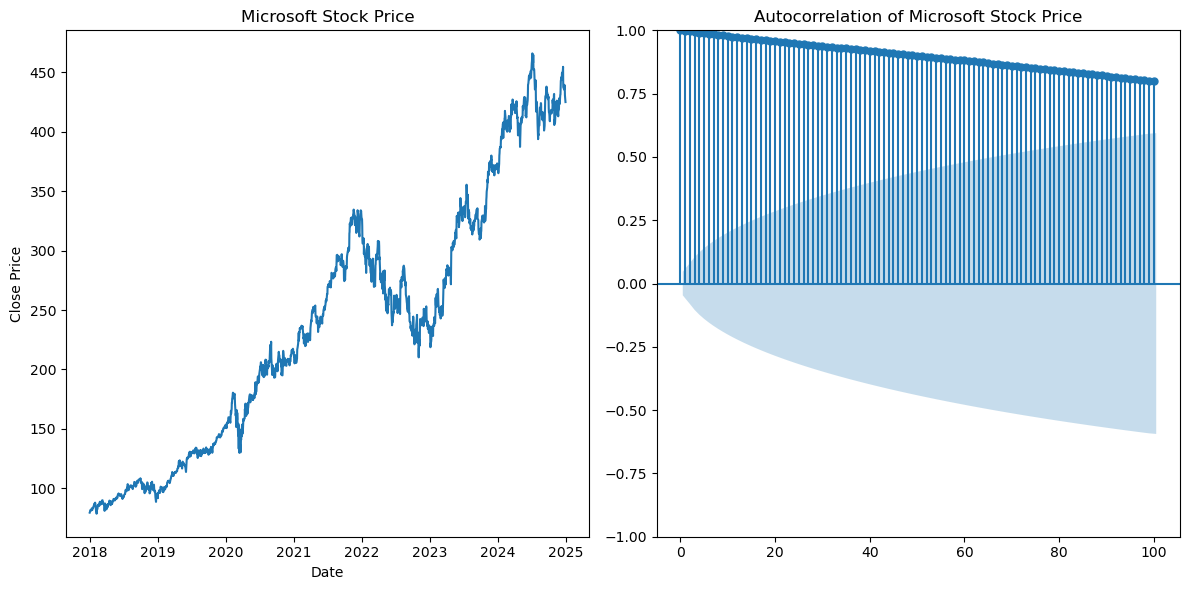

In [44]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

x = stock.index.to_numpy()
y = stock['Close'].to_numpy()
ax1.plot(x, y)
ax1.set_title('Microsoft Stock Price')
ax1.set_xlabel('Date')
ax1.set_ylabel('Close Price')

plot_acf(stock['Close'], lags=100, ax=ax2)
ax2.set_title('Autocorrelation of Microsoft Stock Price')

plt.tight_layout()
plt.show()

## 예제 3-7. 백색 잡음 예시

### 아메리칸 에어라인 주가 데이터

#### 필요한 패키지 불러오기

In [70]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot
import statsmodels.api as sm
import yfinance as yf

In [ ]:
ticker = yf.Ticker("063170.KQ")
start_date = "2018-01-01"
end_date = "2024-12-31"

stock = ticker.history(period='1d')
stock

Failed to get ticker '063170.KQ' reason: Expecting value: line 1 column 1 (char 0)
$063170.KQ: possibly delisted; no price data found  (period=1d)


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,


#### 데이터 불러오기

In [46]:
aus_livestock = pd.read_csv('https://raw.githubusercontent.com/safeai-snu/Econometrics/refs/heads/main/Part.1/data/aus_livestock.csv')

#### 데이터 전처리

In [47]:
aus_livestock['Month'] = pd.to_datetime(aus_livestock['Month'])
pigs = aus_livestock[(aus_livestock['State'] == "Victoria") &
                     (aus_livestock['Animal'] == "Pigs") &
                     (aus_livestock['Month'].dt.year >= 2014)]

#### 시각화

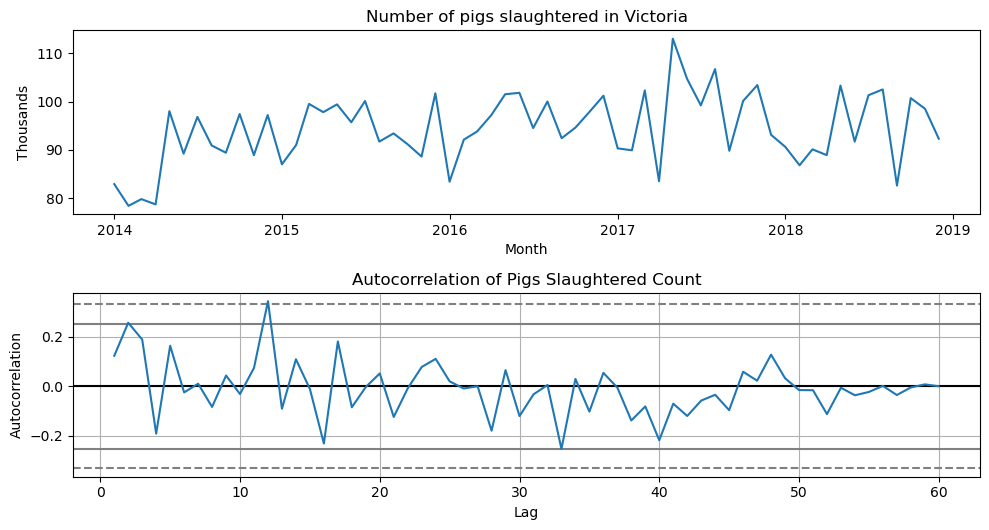

In [48]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 5.4))

x = pigs['Month'].to_numpy()
y = pigs['Count'].to_numpy()

ax1.plot(x, y/ 1e3)
ax1.set_title('Number of pigs slaughtered in Victoria')
ax1.set_ylabel('Thousands')
ax1.set_xlabel('Month')

autocorrelation_plot(pigs['Count'], ax=ax2)
ax2.set_title('Autocorrelation of Pigs Slaughtered Count')

plt.tight_layout()
plt.show()